In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# 시계열 데이터 생성
np.random.seed(0)
n = 100  # 데이터 포인트 수
ma_params = [0.4, -0.2]  # 이동평균 계수
residuals = np.random.normal(0, 1, n)  # 잔차 생성

In [3]:
# MA(2) 모델 생성
data = [0, 0]  # 초기값 설정
for i in range(2, n):
    data.append(ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2] + residuals[i])

In [4]:
# 데이터프레임 생성
df = pd.DataFrame({'Value' : data})
print(df)

       Value
0   0.000000
1   0.000000
2   0.785990
3   2.552357
4   2.568168
..       ...
95  0.653792
96  0.221856
97  1.648756
98  0.839160
99  0.095580

[100 rows x 1 columns]


In [5]:
# MA(2) 모델 적합
model = ARIMA(df['Value'], order=(0, 0, 2))
results = model.fit()

In [6]:
# MA(2) 모델 정보출력 
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -140.502
Date:                Tue, 13 Jun 2023   AIC                            289.003
Time:                        15:42:29   BIC                            299.424
Sample:                             0   HQIC                           293.221
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0436      0.134      0.324      0.746      -0.220       0.307
ma.L1          0.4539      0.093      4.905      0.000       0.273       0.635
ma.L2         -0.0975      0.112     -0.870      0.3

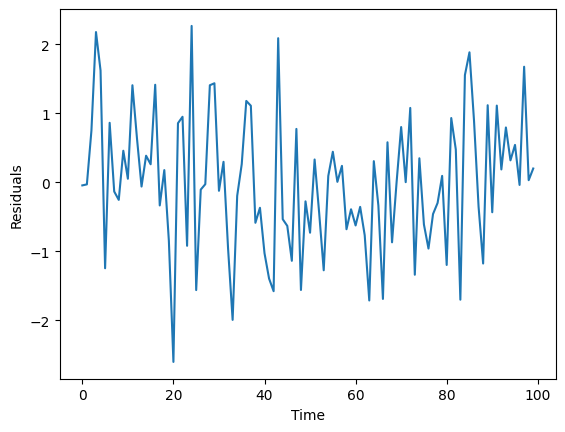

In [8]:
# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()